<a href="https://colab.research.google.com/github/jerome-keli/Data-Science/blob/main/ZWL_Co_Authorship_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**
The "ZWL Co-Authorship Network" dataset is a valuable resource designed to facilitate link prediction tasks within the domain of academic collaboration networks. This dataset captures the intricate web of collaborations between authors, shedding light on potential future connections that could emerge within the academic community.

The dataset represents a graph where nodes correspond to authors, and edges symbolize co-authorships between them. Each edge signifies a past collaborative effort in academic research or publication. The dataset's temporal aspect is of particular significance, as it allows researchers to discern the evolution of collaboration patterns over time.

With a strong emphasis on accuracy and relevance, the "ZWL Co-Authorship Network" dataset presents an opportunity for researchers to explore cutting-edge link prediction techniques. Researchers and data scientists can utilize this dataset to develop and evaluate algorithms capable of predicting the formation of future collaborations among authors.

As an academic English dataset, the "ZWL Co-Authorship Network" fosters a comprehensive understanding of the underlying dynamics within academic collaboration networks. Its attributes offer a plethora of opportunities for feature engineering, including measures of node centrality, community structure, and co-authorship history.

By availing themselves of this dataset, researchers can contribute to the advancement of link prediction methodologies, thereby enhancing the ability to forecast and anticipate scholarly collaborations. Furthermore, the dataset serves as a platform for empirical studies in the realm of network science, empowering scholars to unravel the intricate relationships that govern academic collaboration.



www.kaggle.com. (n.d.). ZWL co-authorship network for link prediction task. [online] Available at: https://www.kaggle.com/datasets/adilimadeddinehosni/zwl-co-authorship-network/code [Accessed 19 Mar. 2024].

## **Research Question**
How do influence dynamics within the ZWL Co-Authorship Network affect the formation of future academic collaborations, and can models of social influence predict emerging patterns of co-authorship?

### Importing relevant libraries

In [11]:
import networkx as nx #for graphs and networks
import pandas as pd
import matplotlib.pyplot as plt

### **Uploading the dataset**

In [12]:
df = pd.read_csv('/content/ZWL.csv')
df.head()

,source,target
0,0,9
1,0,23
2,0,30
3,0,46
4,0,65


In [13]:
df.describe()

,source,target
count,54182.000000,54182.000000
mean,2276.359732,3697.841553
std,1486.564083,1750.637700
min,0.000000,5.000000
25%,1040.000000,2305.000000
50%,2022.000000,3783.000000
75%,3291.000000,5222.000000
max,6638.000000,6650.000000


In [14]:
#Reducing the size of our data
df_new = df[:2500]

### **Visualizing the dataset**

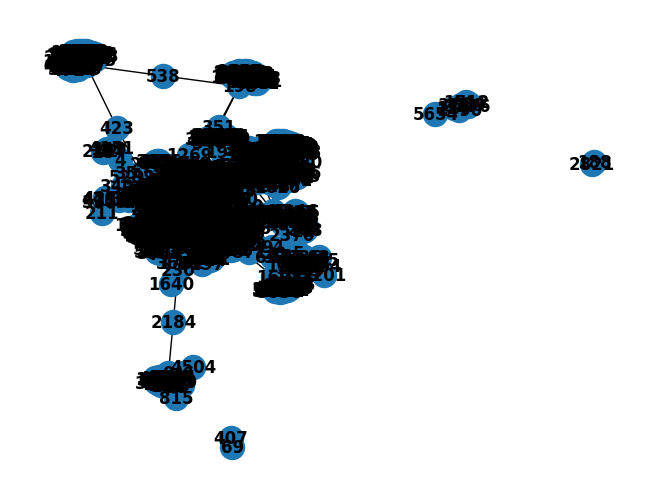

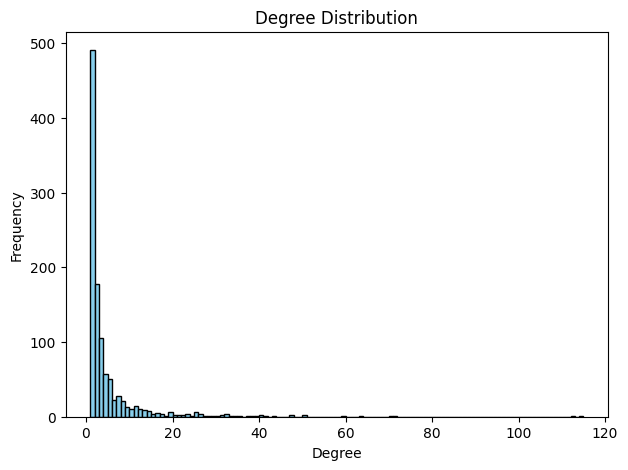

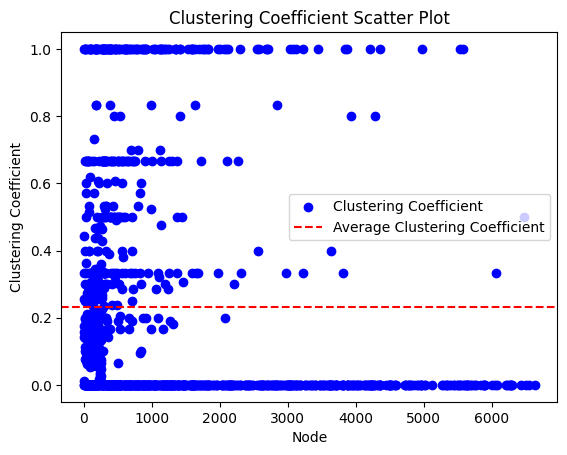

In [45]:
G = nx.from_pandas_edgelist(df_new, 'source', 'target')

# Visualize the graph
nx.draw(G, with_labels=True, font_weight='bold')

# Display the plot
plt.show()

#Displaying degree distribution
degree_sequence = [d for n, d in G.degree()]
plt.figure(figsize=(7,5))
plt.hist(degree_sequence, bins=range(min(degree_sequence),max(degree_sequence)+2),color='skyblue',edgecolor='black')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()



# Extracting node labels and clustering coefficients
clustering_coefficients = nx.clustering(G)
nodes, coefficients = zip(*clustering_coefficients.items())
plt.scatter(nodes, coefficients, marker='o', color='blue', label='Clustering Coefficient')

# Display the average clustering coefficient for the entire graph
avg_clustering_coefficient = nx.average_clustering(G)
plt.axhline(y=avg_clustering_coefficient, color='red', linestyle='--', label='Average Clustering Coefficient')
plt.xlabel('Node')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient Scatter Plot')
plt.legend()
plt.show()

### **Functions**

In [16]:
#function for average degree
def average_degree(graph):
    degrees = [val for (node, val) in graph.degree()]
    avg_degree = sum(degrees) / len(graph)
    return avg_degree

average_degree(G)

4.6040515653775325

In [17]:
network_density = nx.density(G)
print('The network density is ',network_density)

The network density is  0.004243365498043808


In [18]:
def clustering_coefficient(graph):
    # Calculate clustering coefficient for each node and take the average
    clustering_coefficients = nx.clustering(graph)
    avg_clustering_coefficient = sum(clustering_coefficients.values()) / len(graph.nodes)

    return avg_clustering_coefficient

clustering_coefficient(G)


0.2316907586202216

In [19]:
#Finding the number of nodes,edges and degrees of freedom
edge_num = G.number_of_edges()
node_num = G.number_of_nodes()
dof = dict(G.degree())

In [20]:
edge_num

2500

In [21]:
node_num

1086

## **Exploring Influence Dynamics**

### **ER, WS, BA Visualizations**

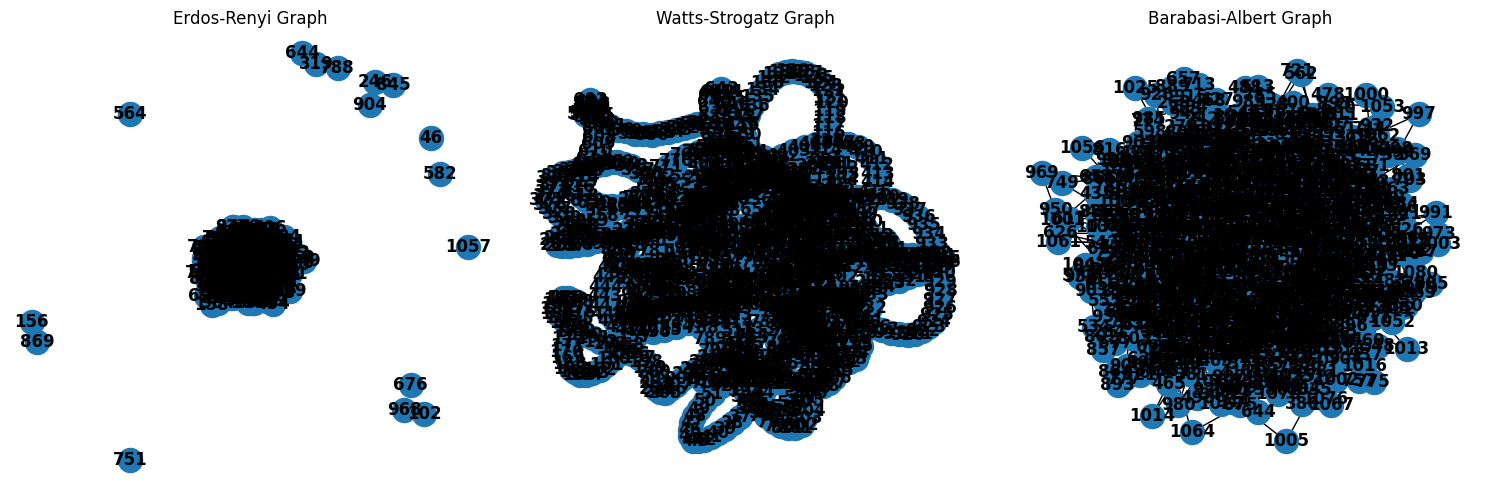

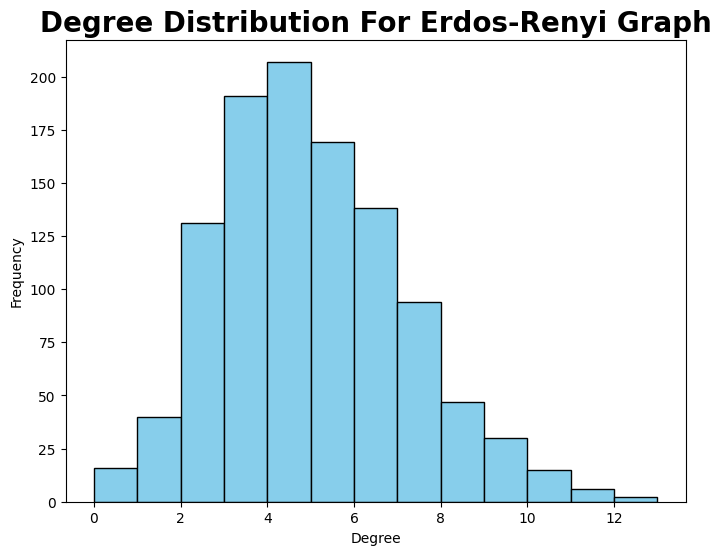

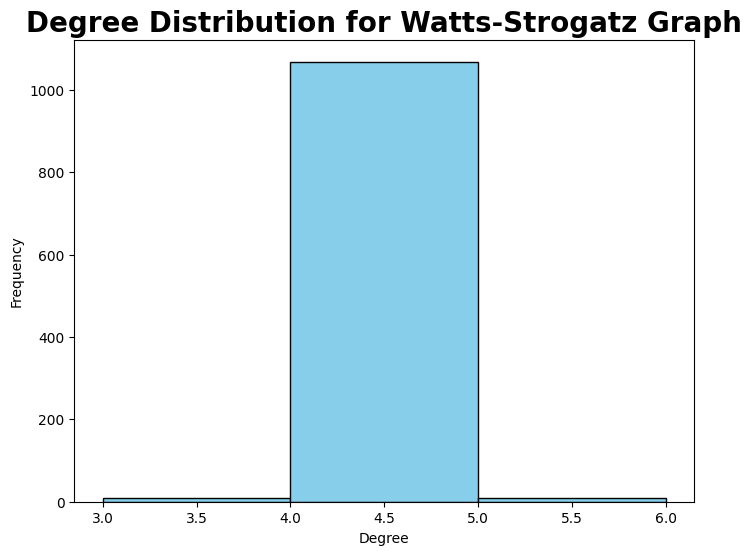

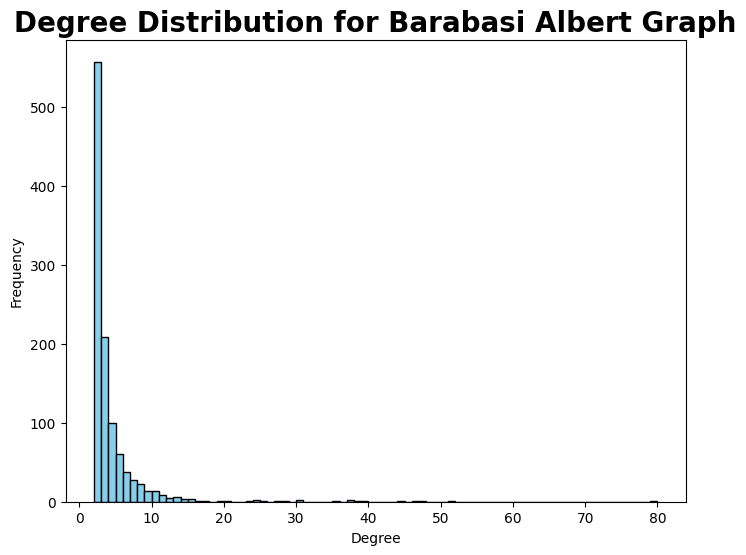

clustering coefficient for Erdos-Renyi Graph: 0.002858099543182416
average degree for Erdos-Renyi Graph: 4.530386740331492 
network density for Erdos-Renyi Graph: 0.0041754716500751075


In [51]:
#erdos-reiny graph(random)
erdos_renyi_graph = nx.erdos_renyi_graph(n=node_num,p=network_density)#p = probability(it is the density)

#Watts-Strogatz Graph(hybrid)
watts_strogatz_graph = nx.watts_strogatz_graph(n=node_num, k=4, p=0.004243365498043808)#k=dof

#Barbasi -Albert Graph(scale free)
barabasi_albert_graph = nx.barabasi_albert_graph(n=node_num, m=2)

#Plotting the graph
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.title("Erdos-Renyi Graph")#Poissonian
nx.draw(erdos_renyi_graph, with_labels=True, font_weight ='bold')

plt.subplot(132)
plt.title("Watts-Strogatz Graph")#Poisssonian
nx.draw(watts_strogatz_graph, with_labels=True, font_weight ='bold')

plt.subplot(133)
plt.title("Barabasi-Albert Graph")#Power law
nx.draw(barabasi_albert_graph, with_labels=True, font_weight ='bold')

plt.tight_layout()
plt.show()

degree_sequence = [d for n, d in erdos_renyi_graph.degree()]
plt.figure(figsize=(8,6))
plt.hist(degree_sequence, bins=range(min(degree_sequence),max(degree_sequence)+2),color='skyblue',edgecolor='black')
plt.title('Degree Distribution For Erdos-Renyi Graph',fontweight='bold',fontsize=15)
plt.xlabel('Degree',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.show()

degree_sequence = [d for n, d in watts_strogatz_graph.degree()]
plt.figure(figsize=(8,6))
plt.hist(degree_sequence, bins=range(min(degree_sequence),max(degree_sequence)+2),color='skyblue',edgecolor='black')
plt.title('Degree Distribution for Watts-Strogatz Graph',fontweight='bold',fontsize=15)
plt.xlabel('Degree',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.show()

degree_sequence = [d for n, d in barabasi_albert_graph.degree()]
plt.figure(figsize=(8,6))
plt.hist(degree_sequence, bins=range(min(degree_sequence),max(degree_sequence)+2),color='skyblue',edgecolor='black')
plt.title('Degree Distribution for Barabasi Albert Graph',fontweight='bold',fontsize=15)
plt.xlabel('Degree',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.show()

print(f'clustering coefficient for Erdos-Renyi Graph: {clustering_coefficient(erdos_renyi_graph)}')
print(f'average degree for Erdos-Renyi Graph: {average_degree(erdos_renyi_graph)} ')
print(f'network density for Erdos-Renyi Graph: {nx.density(erdos_renyi_graph)}')


In [23]:
print(f'clustering coefficient for Watts-Strogatz Graph: {clustering_coefficient(watts_strogatz_graph)}')
print(f'average degree for Watts-Strogatz Graph: {average_degree(watts_strogatz_graph)}')
print(f'network density for Watts-Strogatz Graph: {nx.density(watts_strogatz_graph)}')

clustering coefficient for Watts-Strogatz Graph: 0.49416820135052164
average degree for Watts-Strogatz Graph: 4.0
network density for Watts-Strogatz Graph: 0.003686635944700461


In [24]:
print(f'clustering coefficient for Barabasi-Albert Graph: {clustering_coefficient(barabasi_albert_graph)}')
print(f'average degree for Barabasi-Albert Graph: {average_degree(barabasi_albert_graph)} ')
print(f'network density for Barabasi-Albert Graph: {nx.density(barabasi_albert_graph)} ')

clustering coefficient for Barabasi-Albert Graph: 0.019553647929988392
average degree for Barabasi-Albert Graph: 3.992633517495396 
network density for Barabasi-Albert Graph: 0.0036798465599035906 


In [28]:
nx.average_shortest_path_length(watts_strogatz_graph)

49.71978511597118

In [29]:
nx.average_shortest_path_length(barabasi_albert_graph)

4.131432305590209

**ER Model**: Relatively uniform distribution of node degrees without clear hubs.\
**BA Model**: Presence of a few highly connected hubs and many nodes with fewer connections, resulting in a star-like pattern.\
**WS Model**: High local clustering but with shortcuts connecting distant parts of the network, giving it a less uniform and more clustered appearance than ER, with shorter path lengths than might be expected in a purely regular lattice.

**Degree Distribution**: Academic co-authorship networks often follow a power-law distribution as a few authors tend to collaborate widely, whereas most authors have fewer collaborations. This aspect is more aligned with the Barabási-Albert (BA) model.\
**Clustering Coefficient**: High clustering is common in co-authorship networks because authors working with the same collaborator are likely to work with each other, hinting at similarities with the Watts-Strogatz (WS) model.\
**Path Length**: Like many real-world networks, co-authorship networks often exhibit small-world characteristics—short path lengths despite high clustering. This makes the Watts-Strogatz (WS) model a potentially good fit as well.\
**Conclusion**:
Based on common characteristics of co-authorship networks, the Barabási-Albert (BA) model and the Watts-Strogatz (WS) model might more closely represent the "ZWL Co-Authorship Network" due to their emphasis on power-law degree distributions and high clustering coefficients, respectively. The Erdős-Rényi (ER) model is less likely to capture the complex patterns of academic collaborations due to its random nature and lower clustering coefficients. However, the exact fit would ideally be determined by a detailed analysis of the network's properties and direct comparison with the visualization of the model above.

### **Finding the central node**

In [49]:
# Calculating centrality measures for real graph
degree_centralities = nx.degree_centrality(G)
betweenness_centralities = nx.betweenness_centrality(G)
eigenvector_centralities = nx.eigenvector_centrality(G)
pagerank_scores = nx.pagerank(G)

# Finding nodes with highest centrality scores
most_central_nodes_degree = sorted(degree_centralities, key=degree_centralities.get, reverse=True)[:10]
most_central_nodes_betweenness = sorted(betweenness_centralities, key=betweenness_centralities.get, reverse=True)[:10]
most_central_nodes_eigenvector = sorted(eigenvector_centralities, key=eigenvector_centralities.get, reverse=True)[:10]
most_central_nodes_pagerank = sorted(pagerank_scores, key=pagerank_scores.get, reverse=True)[:10]

print("Most central nodes by Degree Centrality for real graph:", most_central_nodes_degree)
print("Most central nodes by Betweenness Centrality for real graph:", most_central_nodes_betweenness)
print("Most central nodes by Eigenvector Centrality for real graph:", most_central_nodes_eigenvector)
print("Most central nodes by PageRank Centrality for real graph:", most_central_nodes_pagerank)

Most central nodes by Degree Centrality for real graph: [236, 254, 219, 232, 233, 78, 24, 198, 63, 107]
Most central nodes by Betweenness Centrality for real graph: [236, 219, 76, 218, 423, 198, 254, 98, 270, 232]
Most central nodes by Eigenvector Centrality for real graph: [78, 63, 64, 37, 31, 67, 75, 533, 135, 174]
Most central nodes by PageRank Centrality for real graph: [219, 254, 236, 198, 232, 233, 197, 0, 169, 207]


In [48]:
# Calculating centrality measures for erdos-renyi graph
degree_centralities = nx.degree_centrality(erdos_renyi_graph)
betweenness_centralities = nx.betweenness_centrality(erdos_renyi_graph)
eigenvector_centralities = nx.eigenvector_centrality(erdos_renyi_graph)
pagerank_scores = nx.pagerank(erdos_renyi_graph)

# Finding nodes with highest centrality scores
most_central_nodes_degree = sorted(degree_centralities, key=degree_centralities.get, reverse=True)[:10]
most_central_nodes_betweenness = sorted(betweenness_centralities, key=betweenness_centralities.get, reverse=True)[:10]
most_central_nodes_eigenvector = sorted(eigenvector_centralities, key=eigenvector_centralities.get, reverse=True)[:10]
most_central_nodes_pagerank = sorted(pagerank_scores, key=pagerank_scores.get, reverse=True)[:10]

print("Most central nodes by Degree Centrality for erdos_renyi_graph:", most_central_nodes_degree)
print("Most central nodes by Betweenness Centrality for erdos_renyi_graph:", most_central_nodes_betweenness)
print("Most central nodes by Eigenvector Centrality for erdos_renyi_graph:", most_central_nodes_eigenvector)
print("Most central nodes by PageRank Centrality for erdos_renyi_graph:", most_central_nodes_pagerank)

Most central nodes by Degree Centrality for erdos_renyi_graph: [35, 345, 243, 495, 850, 138, 148, 589, 629, 721]
Most central nodes by Betweenness Centrality for erdos_renyi_graph: [345, 243, 850, 795, 721, 495, 35, 138, 148, 629]
Most central nodes by Eigenvector Centrality for erdos_renyi_graph: [345, 850, 495, 795, 243, 35, 614, 148, 138, 163]
Most central nodes by PageRank Centrality for erdos_renyi_graph: [35, 345, 243, 850, 1003, 495, 589, 721, 432, 138]


In [47]:
# Calculating centrality measures for watts-strogatz graph
degree_centralities = nx.degree_centrality(watts_strogatz_graph)
betweenness_centralities = nx.betweenness_centrality(watts_strogatz_graph)
pagerank_scores = nx.pagerank(watts_strogatz_graph)

# Finding nodes with highest centrality scores
most_central_nodes_degree = sorted(degree_centralities, key=degree_centralities.get, reverse=True)[:10]
most_central_nodes_betweenness = sorted(betweenness_centralities, key=betweenness_centralities.get, reverse=True)[:10]
most_central_nodes_eigenvector = sorted(eigenvector_centralities, key=eigenvector_centralities.get, reverse=True)[:10]
most_central_nodes_pagerank = sorted(pagerank_scores, key=pagerank_scores.get, reverse=True)[:10]

print("Most central nodes by Degree Centrality for watts strogatz graph:", most_central_nodes_degree)
print("Most central nodes by Betweenness Centrality for watts strogatz graph:", most_central_nodes_betweenness)
print("Most central nodes by PageRank Centrality for watts strogatz graph:", most_central_nodes_pagerank)

Most central nodes by Degree Centrality for watts strogatz graph: [230, 259, 488, 690, 733, 817, 837, 948, 1043, 1062]
Most central nodes by Betweenness Centrality for watts strogatz graph: [441, 817, 443, 440, 1062, 455, 445, 780, 457, 447]
Most central nodes by PageRank Centrality for watts strogatz graph: [230, 259, 488, 1043, 690, 733, 817, 837, 948, 1062]


In [46]:
# Calculating centrality measures for barabasi albert graph
degree_centralities = nx.degree_centrality(barabasi_albert_graph)
betweenness_centralities = nx.betweenness_centrality(barabasi_albert_graph)
eigenvector_centralities = nx.eigenvector_centrality(barabasi_albert_graph)
pagerank_scores = nx.pagerank(barabasi_albert_graph)

# Finding nodes with highest centrality scores
most_central_nodes_degree = sorted(degree_centralities, key=degree_centralities.get, reverse=True)[:10]
most_central_nodes_betweenness = sorted(betweenness_centralities, key=betweenness_centralities.get, reverse=True)[:10]
most_central_nodes_eigenvector = sorted(eigenvector_centralities, key=eigenvector_centralities.get, reverse=True)[:10]
most_central_nodes_pagerank = sorted(pagerank_scores, key=pagerank_scores.get, reverse=True)[:10]

print("Most central nodes by Degree Centrality for barabasi albert graph:", most_central_nodes_degree)
print("Most central nodes by Betweenness Centrality for barabasi albert graph:", most_central_nodes_betweenness)
print("Most central nodes by Eigenvector Centrality for barabasi albert graph:", most_central_nodes_eigenvector)
print("Most central nodes by PageRank Centrality for barabasi albert graph:", most_central_nodes_pagerank)

Most central nodes by Degree Centrality for barabasi albert graph: [4, 7, 5, 2, 0, 26, 21, 9, 99, 54]
Most central nodes by Betweenness Centrality for barabasi albert graph: [4, 5, 7, 2, 0, 26, 9, 21, 16, 28]
Most central nodes by Eigenvector Centrality for barabasi albert graph: [4, 2, 5, 7, 0, 9, 23, 15, 8, 41]
Most central nodes by PageRank Centrality for barabasi albert graph: [4, 7, 5, 2, 0, 26, 21, 99, 9, 54]


## **Formation of Future Academic Collaborations**

### **Applying Linear Threshold Model and Independent Cascade Model**

In [36]:
#function for linear threshold model
import random

def linear_threshold_model(G, initial_active_nodes, iterations=10):
    # Assign a random threshold to each node
    thresholds = {node: random.random() for node in G.nodes()}
    # Set initial active nodes
    active_nodes = set(initial_active_nodes)

    for _ in range(iterations):
        new_active_nodes = set()
        for node in G.nodes():
            if node not in active_nodes:
                # Count active neighbors
                active_neighbors = sum([1 for neighbor in G.neighbors(node) if neighbor in active_nodes])
                # Check if active neighbors exceed threshold
                if active_neighbors / G.degree(node) >= thresholds[node]:
                    new_active_nodes.add(node)
        # Update active nodes
        active_nodes.update(new_active_nodes)
        if not new_active_nodes:
            break  # Stop if no new activations

    return active_nodes


In [37]:
#function for independent casacde model
def independent_cascade_model(G, initial_active_nodes, activation_prob=0.1, iterations=10):
    active_nodes = set(initial_active_nodes)
    newly_active_nodes = set(initial_active_nodes)

    for _ in range(iterations):
        current_newly_active_nodes = set()
        for active_node in newly_active_nodes:
            for neighbor in G.neighbors(active_node):
                if neighbor not in active_nodes and random.random() < activation_prob:
                    current_newly_active_nodes.add(neighbor)
        newly_active_nodes = current_newly_active_nodes
        active_nodes.update(newly_active_nodes)
        if not newly_active_nodes:
            break  # Stop if no new activations

    return active_nodes


In [38]:
#selecting initial active nodes based on degree centrality
degree_centralities = nx.degree_centrality(G)
sorted_nodes_by_degree = sorted(degree_centralities.items(), key=lambda x: x[1], reverse=True)
top_10_percent = int(0.1 * len(G.nodes()))
initial_active_nodes = [node for node, _ in sorted_nodes_by_degree[:top_10_percent]]

In [39]:
#selecting initial active nodes based on eigenvector centrality
eigenvector_centralities = nx.eigenvector_centrality(G)
sorted_ec = sorted(eigenvector_centralities.items(), key=lambda x: x[1], reverse=True)
initial_active_nodes_ec = [node for node, _ in sorted_nodes_by_degree[:top_10_percent]]

In [40]:
#selecting initial active nodes based on betweenness centrality
betweenness_centralities = nx.betweenness_centrality(G)
sorted_bc = sorted(betweenness_centralities.items(), key=lambda x: x[1], reverse=True)
initial_active_nodes_bc = [node for node, _ in sorted_bc[:top_10_percent]]

### **New collaborations**

In [42]:
#Run the Models
ltm_active_nodes = linear_threshold_model(G, initial_active_nodes)
icm_active_nodes = independent_cascade_model(G, initial_active_nodes)

print(f"Potential new collaborations after LTM using degree centralites: {len(ltm_active_nodes)}")
print(f"Potential new collaborations after ICM using degree centralities: {len(icm_active_nodes)}")

Potential new collaborations after LTM using degree centralites: 1068
Potential new collaborations after ICM using degree centralities: 282


In [43]:
ltm_active_nodes_ec = linear_threshold_model(G, initial_active_nodes_ec)
icm_active_nodes_ec = independent_cascade_model(G, initial_active_nodes_ec)

print(f"Potential new collaborations after LTM using eigenvector centralites: {len(ltm_active_nodes_ec)}")
print(f"Potential new collaborations after ICM using eigenvector centralities: {len(icm_active_nodes_ec)}")

Potential new collaborations after LTM using eigenvector centralites: 1075
Potential new collaborations after ICM using eigenvector centralities: 288


In [44]:
ltm_active_nodes_bc = linear_threshold_model(G, initial_active_nodes_bc)
icm_active_nodes_bc = independent_cascade_model(G, initial_active_nodes_bc)

print(f"Potential new collaborations after LTM using betweenness centralites: {len(ltm_active_nodes_bc)}")
print(f"Potential new collaborations after ICM using betweenness centralities: {len(icm_active_nodes_bc)}")

Potential new collaborations after LTM using betweenness centralites: 1075
Potential new collaborations after ICM using betweenness centralities: 308
